# 00. Data Acquisition (Pipeline)

In [1]:
# importing the required modules
from pathlib import Path
import urllib
import pandas as pd
import os
from zipfile import ZipFile
import shutil
import osmnx as ox
import geopandas as gpd
import ssl

/root/venv/lib/python3.9/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/root/venv/lib/python3.9/site-packages/osmnx/projection.py:3: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/mi

In [2]:
# papermill parameters cell

OUTPUT_WARNINGS = False

In [3]:
if OUTPUT_WARNINGS is False:
    import warnings

    warnings.filterwarnings("ignore")

### Data

In [4]:
# Data folders
RAW_FOLDER = "data/raw/"
ADMBOUND_RAW_FOLDER = "data/raw/AdmBound_rawdata/"
W2_RAW_FOLDER = "data/raw/W2_rawdata/"
W3_RAW_FOLDER = "data/raw/W3_rawdata/"
DEMOGRAPHIC_RAW_FOLDER = "data/raw/demographic_rawdata/"

# create folder data/raw/ if not exists
Path(RAW_FOLDER).mkdir(parents=True, exist_ok=True)
Path(ADMBOUND_RAW_FOLDER).mkdir(parents=True, exist_ok=True)
Path(W2_RAW_FOLDER).mkdir(parents=True, exist_ok=True)
Path(W3_RAW_FOLDER).mkdir(parents=True, exist_ok=True)
Path(DEMOGRAPHIC_RAW_FOLDER).mkdir(parents=True, exist_ok=True)

In [5]:
# Datasets 
ADMBOUND_INTERIMDATA = "data/interim/AdmBound_interimdata/AdmBound_interimdata.shp"

# PART 1 - GENERAL MUNICIPAL DATA

## Administrative Boundaries Spain

In [ ]:
# read the zip folder from the url and save in raw folder map (Adm. Boundaries)
outfilename = "lineas_limite_gml.zip"
url_of_file = "http://centrodedescargas.cnig.es/CentroDescargas/documentos/atom/au/lineas_limite_gml.zip"

# exports the dataframe into zip file
file_name = 'AdmBound_rawdata'
data_format = '.zip'

export_name = ADMBOUND_RAW_FOLDER + file_name + data_format

file = urllib.request.urlretrieve(url_of_file, export_name) 

NameError: name 'ADMBOUND_RAW_FOLDER' is not defined

In [ ]:
# Unpack raw zipfolder
zip = ZipFile(export_name)
zip.extractall(ADMBOUND_RAW_FOLDER)

In [ ]:
# delete zipfolder
os.remove(export_name)

## Population Register

In [ ]:
# read the zip folder from the url and save in raw folder map (Population_Register)
outfilename = "pobmun_en.zip"
url_of_file = "https://www.ine.es/en/pob_xls/pobmun_en.zip"

# exports the dataframe into zip file
file_name = 'POP21_rawdata'
data_format = '.zip'

export_name = RAW_FOLDER + file_name + data_format

file = urllib.request.urlretrieve(url_of_file, export_name)

In [ ]:
# Unpack raw zipfolder
zip = ZipFile(export_name)
zip.extractall(RAW_FOLDER)

In [ ]:
# Copy raw data file from unzipped folder to raw data folder
# Copy objective file to RAW_FOLDER
src = RAW_FOLDER + 'pobmun_en/pobmun21.xlsx'
dst = RAW_FOLDER + 'pobmun21.xlsx'
shutil.copy(src, dst)

# Rename file
old_name = RAW_FOLDER + 'pobmun21.xlsx'
new_name = RAW_FOLDER + file_name + '.xlsx'

os.rename(old_name, new_name)

In [ ]:
# folders to be deleted
zip_folder = export_name
unzipped_folder = RAW_FOLDER + 'pobmun_en'

# delete folders in unpacked zipfolder
os.remove(zip_folder)
shutil.rmtree(unzipped_folder, ignore_errors=False, onerror=None)

# PART 2 - KPI DATA

## D1

In [9]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

# read the raw excel file from the url and save in raw folder map
outfilename = "PID"
url_of_file = "https://dataobsae.administracionelectronica.gob.es/cmobsae3/explorer/Download.action?systemFileName=1965177.xlsx&userFileName=Informe++Organismos+usuarios+de+los+servicios+de+la+SGAD++%28publicado%29.xlsx"

# exports the dataframe into excel file
folder = RAW_FOLDER
file_name = 'D1_rawdata'
data_format = '.xlsx'

export_name = folder + file_name + data_format

file = urllib.request.urlretrieve(url_of_file, export_name) 


## D2

In [10]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

# read the raw excel file from the url and save in raw folder map
outfilename = "Cl@ve"
url_of_file = "https://dataobsae.administracionelectronica.gob.es/cmobsae3/explorer/Download.action?systemFileName=1965177.xlsx&userFileName=Informe++Organismos+usuarios+de+los+servicios+de+la+SGAD++%28publicado%29.xlsx"

# exports the dataframe into excel file
folder = RAW_FOLDER
file_name = 'D2_rawdata'
data_format = '.xlsx'

export_name = folder + file_name + data_format

file = urllib.request.urlretrieve(url_of_file, export_name) 


## D3

In [ ]:
# read the raw excel file from the url and save in raw folder map
outfilename = "Cobertura_BA_Espa%C3%B1a_2021_MUN_PROV_CCAA_Nacional_datosgob.xlsx"
url_of_file = "https://avancedigital.mineco.gob.es/banda-ancha/cobertura/Documents/Cobertura_BA_Espa%C3%B1a_2021_MUN_PROV_CCAA_Nacional_datosgob.xlsx"

# exports the dataframe into excel file
folder = RAW_FOLDER
file_name = 'D3_rawdata'
data_format = '.xlsx'

export_name = folder + file_name + data_format

file = urllib.request.urlretrieve(url_of_file, export_name) 


## D4

In [11]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

# read the raw excel file from the url and save in raw folder map
outfilename = "SGAD.xlsx"
url_of_file = "https://dataobsae.administracionelectronica.gob.es/cmobsae3/explorer/Download.action?systemFileName=1965177.xlsx&userFileName=Informe++Organismos+usuarios+de+los+servicios+de+la+SGAD++%28publicado%29.xlsx"

# exports the dataframe into excel file
folder = RAW_FOLDER
file_name = 'D4_rawdata'
data_format = '.xlsx'

export_name = folder + file_name + data_format

file = urllib.request.urlretrieve(url_of_file, export_name) 


## ECR1

In [ ]:
# read the raw excel file from the url and save in raw folder map
outfilename = "ECR1_rawdata_13102022.xlsx"
url_of_file = "https://github.com/renswvw/CircularCityIndex/blob/main/data/raw/ECR1_rawdata_13102022.xlsx?raw=true"

# exports the dataframe into excel file
folder = RAW_FOLDER
file_name = 'ECR1_rawdata'
data_format = '.xlsx'

export_name = folder + file_name + data_format

file = urllib.request.urlretrieve(url_of_file, export_name) 


## ECR2

In [ ]:
# read the raw excel file from the url and save in raw folder map
outfilename = "ECR2_rawdata_13102022.xlsx"
url_of_file = "https://github.com/renswvw/CircularCityIndex/blob/main/data/raw/ECR2_rawdata_13102022.xlsx?raw=true"

# exports the dataframe into excel file
folder = RAW_FOLDER
file_name = 'ECR2_rawdata'
data_format = '.xlsx'

export_name = folder + file_name + data_format

file = urllib.request.urlretrieve(url_of_file, export_name) 


## ECR4

In [ ]:
# read the zip folder from the url and save in raw folder map (ECR4)
outfilename = "AQ_2019_shape-files.zip"
url_of_file = "https://cmshare.eea.europa.eu/s/3QWD6oAkoe8JGpj/download/AQ_2019_shape-files.zip"

# exports the dataframe into zip file
file_name = 'ECR4_rawdata'
data_format = '.zip'

export_name = RAW_FOLDER + file_name + data_format

file = urllib.request.urlretrieve(url_of_file, export_name) 

In [ ]:
# Unpack raw zipfolder
zip = ZipFile(export_name)
zip.extractall(RAW_FOLDER)

In [ ]:
# Copy objective file to RAW_FOLDER
src = RAW_FOLDER + 'AQ_2019_shape-files/PM10/interpolated-values/geoTIFF/pm10_avg19.tif'
dst = RAW_FOLDER + 'pm10_avg19.tif'
shutil.copy(src, dst)

# Rename file
old_name = RAW_FOLDER + 'pm10_avg19.tif'
new_name = RAW_FOLDER + file_name + '.tif'
os.rename(old_name, new_name)

In [ ]:
# folders to be deleted
zip_folder = export_name
unzipped_folder = RAW_FOLDER + 'AQ_2019_shape-files'

# delete folders in unpacked zipfolder
os.remove(zip_folder)
shutil.rmtree(unzipped_folder, ignore_errors=False, onerror=None)

## ECR5

In [ ]:
# read the zip folder from the url and save in raw folder map
outfilename = "AQ_2019_shape-files.zip"
url_of_file = "https://cmshare.eea.europa.eu/s/3QWD6oAkoe8JGpj/download/AQ_2019_shape-files.zip"

# exports the dataframe into zip file
file_name = 'ECR5_rawdata'
data_format = '.zip'

export_name = RAW_FOLDER + file_name + data_format

file = urllib.request.urlretrieve(url_of_file, export_name) 

In [ ]:
# Unpack raw zipfolder
zip = ZipFile(export_name)
zip.extractall(RAW_FOLDER)

In [ ]:
# Copy objective file to RAW_FOLDER
src = RAW_FOLDER + 'AQ_2019_shape-files/NOx/interpolated-values/geoTIFF/nox_avg19.tif'
dst = RAW_FOLDER + 'nox_avg19.tif'
shutil.copy(src, dst)

# Rename file
old_name = RAW_FOLDER + 'nox_avg19.tif'
new_name = RAW_FOLDER + file_name + '.tif'
os.rename(old_name, new_name)

In [ ]:
# folders to be deleted
zip_folder = export_name
unzipped_folder = RAW_FOLDER + 'AQ_2019_shape-files'

# delete folders in unpacked zipfolder
os.remove(zip_folder)
shutil.rmtree(unzipped_folder, ignore_errors=False, onerror=None)

## M1

In [ ]:
KPI = 'M1'
region_list = ['Canarias', 'Spain']
tag_list = [{'place': 'square'},{'highway': 'path'},{'highway': 'pedestrian'},{'leisure': 'park'},{'highway': 'footway'},{'foot': 'designated'}]
dataframe_list = []

In [ ]:
municipality_list=gpd.read_file(ADMBOUND_INTERIMDATA)
municipality_list.crs


<Geographic 2D CRS: EPSG:4258>
Name: ETRS89
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Moldova; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain; Sweden; Switzerland; United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-16.1, 32.88, 40.18, 84.73)
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Script is collecting data from: Canarias


NameError: name 'ADMBOUND_INTERIMDATA' is not defined

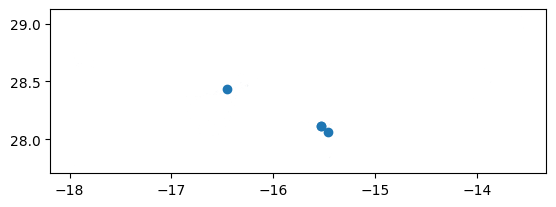

In [ ]:
# for-loop to perform script for regions and tags
for region in region_list:
    print('Script is collecting data from: ' + region)

    # select region
    region_name = region
    #region = gpd.read_file(ADMBOUND_INTERIMDATA)
    #region.plot(figsize=(15,15))

    # Select specify specific tags for KPI
    for tag in tag_list:
        tag_name = str(tag).replace("'", '').replace(" ", '').replace("{", '').replace("}", '').replace(":", '_')
        globals()[f"rawdata_{KPI}_{tag_name}_{region_name}"] = ox.geometries.geometries_from_place(region, tags = tag) # geometries_from_polygon(region['geometry'][0], tags = tag)
        globals()[f"rawdata_{KPI}_{tag_name}_{region_name}"].plot()

        # Join data of tag to polygon 
        polygons = gpd.read_file(ADMBOUND_INTERIMDATA).to_crs(epsg=4326)
        tagGeometries = globals()[f"rawdata_{KPI}_{tag_name}_{region_name}"]

        # Change projection to measure in meters
        if region == 'Canarias':
            polygons = polygons.to_crs(epsg=4083)
            tagGeometries = tagGeometries.to_crs(epsg=4083)
            print('Spatial data projection changed to EPSG:4083')
        else:
            polygons = polygons.to_crs(epsg=2062)
            tagGeometries = tagGeometries.to_crs(epsg=2062)
            print('Spatial data projection changed to EPSG:2062')

        # Spatial Joins
        tagGeometriesInPolygon = gpd.sjoin(tagGeometries, polygons, how="inner", op='intersects')

        # Add a column ['M1_surface'] with a field with square meters (m2)
        tagGeometriesInPolygon['M1_surface'] = tagGeometriesInPolygon.area       

        # Group according to the CTOT column to aggregate data
        tagGeometriesInPolygon.groupby(['CTOT']).sum()
        tagGeometriesInPolygon = tagGeometriesInPolygon.groupby('CTOT').agg({'M1_surface':'sum'}).reset_index()

        # Give name to new dataframe
        globals()[f"df_{KPI}_{tag_name}_{region_name}"] = tagGeometriesInPolygon

        # Append dataframe to dataframe_list
        dataframe_list.append(globals()[f"df_{KPI}_{tag_name}_{region_name}"])

        print('KPI = ' + KPI + ' | Region = ' + region_name + ' | Tag = ' + tag_name + ' --> is collected')


In [ ]:
# Merge seperate dataframe into new dataframe
df_M1_Total = pd.concat(dataframe_list)
df_M1_Total = df_M1_Total.groupby('CTOT').agg({'M1_surface':'sum'}).reset_index()
df_M1_Total

In [ ]:
# exports the dataframe into csv file
file_name = 'M1_rawdata'
data_format = '.csv'

export_name = file_name + data_format

df_M1_Total.to_csv(RAW_FOLDER + export_name, index=False)

## M2

In [ ]:
KPI = 'M2'
region_list = ['Canarias', 'Spain']
tag_list = [{'amenity': 'charging_station'}]
dataframe_list = []

In [ ]:
# for-loop to perform script for regions and tags
for region in region_list:
    print('Script is collecting data from: ' + region)

    # select region
    region_name = region
    #region = gpd.read_file(ADMBOUND_INTERIMDATA)
    #region.plot(figsize=(15,15))

    # Select specify specific tags for KPI
    for tag in tag_list:
        tag_name = str(tag).replace("'", '').replace(" ", '').replace("{", '').replace("}", '').replace(":", '_')
        globals()[f"rawdata_{KPI}_{tag_name}_{region_name}"] = ox.geometries.geometries_from_place(region, tags = tag) # geometries_from_polygon(region['geometry'][0], tags = tag)
        globals()[f"rawdata_{KPI}_{tag_name}_{region_name}"].plot()

        # Join data of tag to polygon 
        polygons = gpd.read_file(ADMBOUND_INTERIMDATA).to_crs(epsg=4326)
        points = globals()[f"rawdata_{KPI}_{tag_name}_{region_name}"]

        # Spatial Joins
        #pointsInPolygon = gpd.sjoin(polygons, points, how="inner", op='intersects')
        pointsInPolygon = gpd.sjoin(points, polygons, how="inner", op='intersects')

        # Add a column ['M2_absolute'] with a field with 1 as a constant value
        pointsInPolygon['M2_absolute']=1

        # Group according to the CTOT column to aggregate data
        pointsInPolygon.groupby(['CTOT']).sum()
        pointsInPolygon = pointsInPolygon.groupby('CTOT').agg({'M2_absolute':'sum'}).reset_index()

        # Give name to new dataframe
        globals()[f"df_{KPI}_{tag_name}_{region_name}"] = pointsInPolygon

        # Append dataframe to dataframe_list
        dataframe_list.append(globals()[f"df_{KPI}_{tag_name}_{region_name}"])

        print('KPI = ' + KPI + ' | Region = ' + region_name + ' | Tag = ' + tag_name + ' --> is collected')


In [ ]:
# Merge seperate dataframe into new dataframe
df_M2_Total = pd.concat(dataframe_list)
df_M2_Total

In [ ]:
# exports the dataframe into csv file
file_name = 'M2_rawdata'
data_format = '.csv'

export_name = file_name + data_format

df_M2_Total.to_csv(RAW_FOLDER + export_name, index=False)

## M3

In [ ]:
KPI = 'M3'
region_list = ['Canarias', 'Spain']
tag_list = [{'cycleway': True},{'highway': 'cycleway'}]
dataframe_list = []

In [ ]:
# for-loop to perform script for regions and tags
for region in region_list:
    print('Script is collecting data from: ' + region)

    # select region
    region_name = region
    #region = gpd.read_file(ADMBOUND_INTERIMDATA)
    #region.plot(figsize=(15,15))

    # Select specify specific tags for KPI
    for tag in tag_list:
        tag_name = str(tag).replace("'", '').replace(" ", '').replace("{", '').replace("}", '').replace(":", '_').replace("*", '')
        globals()[f"rawdata_{KPI}_{tag_name}_{region_name}"] = ox.geometries.geometries_from_place(region, tags = tag) # geometries_from_polygon(region['geometry'][0], tags = tag)
        globals()[f"rawdata_{KPI}_{tag_name}_{region_name}"].plot()

        # Join data of tag to polygon 
        polygons = gpd.read_file(ADMBOUND_INTERIMDATA)
        tagGeometries = globals()[f"rawdata_{KPI}_{tag_name}_{region_name}"]

        # Change projection to measure in meters
        if region == 'Canarias':
            polygons = polygons.to_crs(epsg=4083)
            tagGeometries = tagGeometries.to_crs(epsg=4083)
            print('Spatial data projection changed to EPSG:4083')
        else:
            polygons = polygons.to_crs(epsg=2062)
            tagGeometries = tagGeometries.to_crs(epsg=2062)
            print('Spatial data projection changed to EPSG:2062')

        # Spatial Joins
        tagGeometriesInPolygon = gpd.sjoin(tagGeometries, polygons, how="inner", op='intersects')

        # Add a column ['M3_length'] with a field with length in kilometers
        tagGeometriesInPolygon['M3_length'] = tagGeometriesInPolygon.length / 1000 

        # Group according to the CTOT column to aggregate data
        tagGeometriesInPolygon.groupby(['CTOT']).sum()
        tagGeometriesInPolygon = tagGeometriesInPolygon.groupby('CTOT').agg({'M3_length':'sum'}).reset_index()

        # Give name to new dataframe
        globals()[f"df_{KPI}_{tag_name}_{region_name}"] = tagGeometriesInPolygon

        # Append dataframe to dataframe_list
        dataframe_list.append(globals()[f"df_{KPI}_{tag_name}_{region_name}"])

        print('KPI = ' + KPI + ' | Region = ' + region_name + ' | Tag = ' + tag_name + ' --> is collected')

In [ ]:
# Merge seperate dataframe into new dataframe
df_M3_Total = pd.concat(dataframe_list)
df_M3_Total = df_M3_Total.groupby('CTOT').agg({'M3_length':'sum'}).reset_index()
df_M3_Total

In [ ]:
# exports the dataframe into csv file
file_name = 'M3_rawdata'
data_format = '.csv'

export_name = file_name + data_format

df_M3_Total.to_csv(RAW_FOLDER + export_name, index=False)

## M4

In [ ]:
KPI = 'M4'
region_list = ['Canarias', 'Spain']
tag_list = [{'highway': 'bus_stop'}]
dataframe_list = []

In [ ]:
# for-loop to perform script for regions and tags
for region in region_list:
    print('Script is collecting data from: ' + region)

    # select region
    region_name = region
    #region = gpd.read_file(ADMBOUND_INTERIMDATA)
    #region.plot(figsize=(15,15))

    # Select specify specific tags for KPI
    for tag in tag_list:
        tag_name = str(tag).replace("'", '').replace(" ", '').replace("{", '').replace("}", '').replace(":", '_')
        globals()[f"rawdata_{KPI}_{tag_name}_{region_name}"] = ox.geometries.geometries_from_place(region, tags = tag) # geometries_from_polygon(region['geometry'][0], tags = tag)
        globals()[f"rawdata_{KPI}_{tag_name}_{region_name}"].plot()

        # Join data of tag to polygon 
        polygons = gpd.read_file(ADMBOUND_INTERIMDATA).to_crs(epsg=4326)
        points = globals()[f"rawdata_{KPI}_{tag_name}_{region_name}"]

        # Spatial Joins
        pointsInPolygon = gpd.sjoin(points, polygons, how="inner", op='intersects')

        # Add a column ['M4_absolute'] with a field with 1 as a constant value
        pointsInPolygon['M4_absolute']=1

        # Group according to the CTOT column to aggregate data
        pointsInPolygon.groupby(['CTOT']).sum()
        pointsInPolygon = pointsInPolygon.groupby('CTOT').agg({'M4_absolute':'sum'}).reset_index()

        # Give name to new dataframe
        globals()[f"df_{KPI}_{tag_name}_{region_name}"] = pointsInPolygon

        # Append dataframe to dataframe_list
        dataframe_list.append(globals()[f"df_{KPI}_{tag_name}_{region_name}"])

        print('KPI = ' + KPI + ' | Region = ' + region_name + ' | Tag = ' + tag_name + ' --> is collected')


In [ ]:
# Merge seperate dataframe into new dataframe
df_M4_Total = pd.concat(dataframe_list)
df_M4_Total

In [ ]:
# exports the dataframe into csv file
file_name = 'M4_rawdata'
data_format = '.csv'

export_name = file_name + data_format

df_M4_Total.to_csv(RAW_FOLDER + export_name, index=False)

## W2

In [ ]:
# read the raw excel file from the url and save in raw folder map
outfilename = "W2_rawdata.zip"
url_of_file = "https://github.com/renswvw/CircularCityIndex/blob/main/data/raw/W2_rawdata.zip?raw=true"

# exports the dataframe into excel file
folder = W2_RAW_FOLDER
file_name = 'W2_rawdata'
data_format = '.zip'

export_name = folder + file_name + data_format

file = urllib.request.urlretrieve(url_of_file, export_name) 


In [ ]:
# Unpack raw zipfolder
zip = ZipFile(export_name)
zip.extractall(W2_RAW_FOLDER)

In [ ]:
# folders to be deleted
zip_folder = export_name

# delete folders in unpacked zipfolder
os.remove(zip_folder)

## W3

In [ ]:
# read the raw excel file from the url and save in raw folder map
outfilename = "W3_rawdata.zip"
url_of_file = "https://github.com/renswvw/CircularCityIndex/blob/main/data/raw/W3_rawdata.zip?raw=true"

# exports the dataframe into excel file
folder = W3_RAW_FOLDER
file_name = 'W3_rawdata'
data_format = '.zip'

export_name = folder + file_name + data_format

file = urllib.request.urlretrieve(url_of_file, export_name) 

In [ ]:
# Unpack raw zipfolder
zip = ZipFile(export_name)
zip.extractall(W3_RAW_FOLDER)

In [ ]:
# folders to be deleted
zip_folder = export_name

# delete folders in unpacked zipfolder
os.remove(zip_folder)

# PART 3 - SOCIODEMOGRAPHIC & ECONOMIC DATA

## Income

In [ ]:
# read the raw excel file from the url and save in raw folder map
outfilename = "30824.xlsx"
url_of_file = "https://www.ine.es/jaxiT3/files/t/es/xls/30824.xlsx"

# exports the dataframe into excel file
folder = DEMOGRAPHIC_RAW_FOLDER
file_name = 'INCOME_rawdata'
data_format = '.xlsx'

export_name = folder + file_name + data_format

file = urllib.request.urlretrieve(url_of_file, export_name) 


## Demographic

In [ ]:
# read the raw excel file from the url and save in raw folder map
outfilename = "30832.xlsx"
url_of_file = "https://www.ine.es/jaxiT3/files/t/es/xlsx/30832.xlsx"

# exports the dataframe into excel file
folder = DEMOGRAPHIC_RAW_FOLDER
file_name = 'DEMOGRAPHIC_rawdata'
data_format = '.xlsx'

export_name = folder + file_name + data_format

file = urllib.request.urlretrieve(url_of_file, export_name) 


## GINI

In [ ]:
# read the raw excel file from the url and save in raw folder map
outfilename = "37677.xlsx"
url_of_file = "https://www.ine.es/jaxiT3/files/t/es/xlsx/37677.xlsx"

# exports the dataframe into excel file
folder = DEMOGRAPHIC_RAW_FOLDER
file_name = 'GINI_rawdata'
data_format = '.xlsx'

export_name = folder + file_name + data_format

file = urllib.request.urlretrieve(url_of_file, export_name) 

## Demographic growth

In [ ]:
# read the raw excel file from the url and save in raw folder map
outfilename = "23000.xlsx"
url_of_file = "https://www.ine.es/jaxi/files/_px/es/xlsx/t20/e301/fenom/a2020/l0/23000.xlsx"

# exports the dataframe into excel file
folder = DEMOGRAPHIC_RAW_FOLDER
file_name = 'DEM_GROWTH_rawdata'
data_format = '.xlsx'

export_name = folder + file_name + data_format

file = urllib.request.urlretrieve(url_of_file, export_name) 


## Economy - total companies by sector

In [ ]:
# read the raw excel file from the url and save in raw folder map
outfilename = "4721.xlsx"
url_of_file = "https://www.ine.es/jaxiT3/files/t/es/xlsx/4721.xlsx"

# exports the dataframe into excel file
folder = DEMOGRAPHIC_RAW_FOLDER
file_name = 'ECONOMIC_COMPANY_rawdata'
data_format = '.xlsx'

export_name = folder + file_name + data_format

file = urllib.request.urlretrieve(url_of_file, export_name) 

## Oustanding debt of Municipality

In [4]:
# read the raw excel file from the url and save in raw folder map
outfilename = "Deuda-viva-ayuntamientos-20211231.xlsx"
url_of_file = "https://www.hacienda.gob.es/CDI/Sist%20Financiacion%20y%20Deuda/InformacionEELLs/2021/Deuda-viva-ayuntamientos-20211231.xlsx"

# exports the dataframe into excel file
folder = DEMOGRAPHIC_RAW_FOLDER
file_name = 'DEBT_MUNICIPALITY_rawdata'
data_format = '.xlsx'

export_name = folder + file_name + data_format

file = urllib.request.urlretrieve(url_of_file, export_name) 

## Population (per gender)

In [ ]:
# read the raw excel file from the url and save in raw folder map
outfilename = "55200.xlsx"
url_of_file = "https://www.ine.es/jaxi/files/tpx/es/xlsx/55200.xlsx"

# exports the dataframe into excel file
folder = DEMOGRAPHIC_RAW_FOLDER
file_name = 'POP_GENDER_rawdata'
data_format = '.xlsx'

export_name = folder + file_name + data_format

file = urllib.request.urlretrieve(url_of_file, export_name) 

## Residential buildings

In [ ]:
# read the raw excel file from the url and save in raw folder map
outfilename = "9mun00.xlsx"
url_of_file = "https://www.ine.es/jaxi/files/_px/es/xlsx/t20/e244/viviendas/p06/l0/9mun00.xlsx"

# exports the dataframe into excel file
folder = DEMOGRAPHIC_RAW_FOLDER
file_name = 'RESIDENTIAL_BUILDINGS_rawdata'
data_format = '.xlsx'

export_name = folder + file_name + data_format

file = urllib.request.urlretrieve(url_of_file, export_name) 

## Tourist houses

In [ ]:
# read the raw excel file from the url and save in raw folder map
outfilename = "39363.xlsx"
url_of_file = "https://www.ine.es/jaxiT3/files/t/es/xlsx/39363.xlsx"

# exports the dataframe into excel file
folder = DEMOGRAPHIC_RAW_FOLDER
file_name = 'TOURIST_HOUSES_rawdata'
data_format = '.xlsx'

export_name = folder + file_name + data_format

file = urllib.request.urlretrieve(url_of_file, export_name) 

## Unemployment benefits

In [ ]:
# read the raw excel file from the url and save in raw folder map
outfilename = "30825.xlsx"
url_of_file = "https://www.ine.es/jaxiT3/files/t/es/xlsx/30825.xlsx"

# exports the dataframe into excel file
folder = DEMOGRAPHIC_RAW_FOLDER
file_name = 'UNEMPLOYMENT_BENEFITS_rawdata'
data_format = '.xlsx'

export_name = folder + file_name + data_format

file = urllib.request.urlretrieve(url_of_file, export_name) 

## Agriculture

In [ ]:
# read the raw excel file from the url and save in raw folder map
outfilename = "52077.xlsx"
url_of_file = "https://www.ine.es/jaxiT3/files/tpx/es/xlsx/52077.xlsx"

# exports the dataframe into excel file
folder = DEMOGRAPHIC_RAW_FOLDER
file_name = 'AGRICULTURE_rawdata'
data_format = '.xlsx'

export_name = folder + file_name + data_format

file = urllib.request.urlretrieve(url_of_file, export_name) 

## Watermark

In [ ]:
%load_ext watermark

In [ ]:
# NBVAL_IGNORE_OUTPUT
%watermark -a "Rens Wiebe van Wijk" -u -d -t -v -m -g -wb

In [ ]:
# NBVAL_IGNORE_OUTPUT
%watermark -iv

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f11c3f49-2b5e-4e69-9186-d202c2d21fb7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>